In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [3]:
df_train = pd.read_csv("E:\\house_price/train.csv")

In [6]:
df_train.shape

(1460, 81)

In [14]:
# check for duplicates
idsUnique = len(set(df_train.Id))
idsTotal = df_train.shape[0]
idsDupli = idsTotal - idsUnique
print('there are {} dupilcates Ids for {} total entries'.format(idsDupli, idsTotal))


there are 0 dupilcates Ids for 1460 total entries


In [15]:
# Drop the ID colum
df_train.drop('Id', axis = 1, inplace= True)

### Preprocessing

In [ ]:
#Looking for outliers, as indicated 

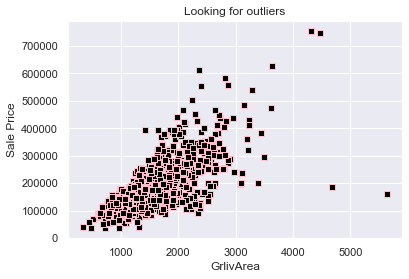

In [20]:
plt.scatter(df_train.GrLivArea, df_train.SalePrice, c= 'black', marker= 's',
           edgecolor = 'pink')
plt.title('Looking for outliers')
plt.xlabel("GrlivArea")
plt.ylabel('Sale Price')
plt.show()


In [23]:
# removing any house more than 4000 square feet from the dataset
df_train = df_train[df_train.GrLivArea <= 4000]
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [36]:
#log transform the target for official scoring
sale_log = np.log(df_train.SalePrice)
df_train.SalePrice = sale_log
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,2.505338
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,2.493950
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,2.510994
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,2.472277
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,2.520050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,2.490934
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,2.505923
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,2.525179
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,2.473548


In [45]:
# Handle missing values for features where median/mean or most common value doesn't make sense

#Alley : data description saly NA 
df_train.loc[:,'Alley'] = df_train.loc[:,'Alley'].fillna('None')

#BedroomAbvgr : NA most likely means 0
df_train.loc[:,"BedroomAbvGr"] = df_train.loc[:,'BedroomAbvGr'].fillna(0)

# BsmtQual etc : data description says NA for basement features is "no basement"
df_train.loc[:, "BsmtQual"] =df_train.loc[:, "BsmtQual"].fillna("No")
df_train.loc[:, "BsmtCond"] = df_train.loc[:, "BsmtCond"].fillna("No")
df_train.loc[:, "BsmtExposure"] = df_train.loc[:, "BsmtExposure"].fillna("No")
df_train.loc[:, "BsmtFinType1"] = df_train.loc[:, "BsmtFinType1"].fillna("No")
df_train.loc[:, "BsmtFinType2"] = df_train.loc[:, "BsmtFinType2"].fillna("No")
df_train.loc[:, "BsmtFullBath"] = df_train.loc[:, "BsmtFullBath"].fillna(0)
df_train.loc[:, "BsmtHalfBath"] = df_train.loc[:, "BsmtHalfBath"].fillna(0)
df_train.loc[:, "BsmtUnfSF"] = df_train.loc[:, "BsmtUnfSF"].fillna(0)

# CentralAir : NA most likely means No
df_train.loc[:, "CentralAir"] = df_train.loc[:, "CentralAir"].fillna("N")

# Condition : NA most likely means Normal
df_train.loc[:, "Condition1"] = df_train.loc[:, "Condition1"].fillna("Norm")
df_train.loc[:, "Condition2"] = df_train.loc[:, "Condition2"].fillna("Norm")

# EnclosedPorch : NA most likely means no enclosed porch
df_train.loc[:, "EnclosedPorch"] = df_train.loc[:, "EnclosedPorch"].fillna(0)

# External stuff : NA most likely means average
df_train.loc[:, "ExterCond"] = df_train.loc[:, "ExterCond"].fillna("TA")
df_train.loc[:, "ExterQual"] = df_train.loc[:, "ExterQual"].fillna("TA")

# Fence : data description says NA means "no fence"
df_train.loc[:, "Fence"] =df_train.loc[:, "Fence"].fillna("No")

# FireplaceQu : data description says NA means "no fireplace"
df_train.loc[:, "FireplaceQu"] = df_train.loc[:, "FireplaceQu"].fillna("No")
df_train.loc[:, "Fireplaces"] = df_train.loc[:, "Fireplaces"].fillna(0)

# Functional : data description says NA means typical
df_train.loc[:, "Functional"] = df_train.loc[:, "Functional"].fillna("Typ")

# GarageType etc : data description says NA for garage features is "no garage"
df_train.loc[:, "GarageType"] = df_train.loc[:, "GarageType"].fillna("No")
df_train.loc[:, "GarageFinish"] = df_train.loc[:, "GarageFinish"].fillna("No")
df_train.loc[:, "GarageQual"] = df_train.loc[:, "GarageQual"].fillna("No")
df_train.loc[:, "GarageCond"] = df_train.loc[:, "GarageCond"].fillna("No")
df_train.loc[:, "GarageArea"] = df_train.loc[:, "GarageArea"].fillna(0)
df_train.loc[:, "GarageCars"] = df_train.loc[:, "GarageCars"].fillna(0)

# HalfBath : NA most likely means no half baths above grade
df_train.loc[:, "HalfBath"] = df_train.loc[:, "HalfBath"].fillna(0)

# HeatingQC : NA most likely means typical
df_train.loc[:, "HeatingQC"] =df_train.loc[:, "HeatingQC"].fillna("TA")

# KitchenAbvGr : NA most likely means 0
df_train.loc[:, "KitchenAbvGr"] = df_train.loc[:, "KitchenAbvGr"].fillna(0)

# KitchenQual : NA most likely means typical
df_train.loc[:, "KitchenQual"] = df_train.loc[:, "KitchenQual"].fillna("TA")

# LotFrontage : NA most likely means no lot frontage
df_train.loc[:, "LotFrontage"] = df_train.loc[:, "LotFrontage"].fillna(0)

# LotShape : NA most likely means regular
df_train.loc[:, "LotShape"] = df_train.loc[:, "LotShape"].fillna("Reg")

# MasVnrType : NA most likely means no veneer
df_train.loc[:, "MasVnrType"] = df_train.loc[:, "MasVnrType"].fillna("None")
df_train.loc[:, "MasVnrArea"] = df_train.loc[:, "MasVnrArea"].fillna(0)

# MiscFeature : data description says NA means "no misc feature"
df_train.loc[:, "MiscFeature"] = df_train.loc[:, "MiscFeature"].fillna("No")
df_train.loc[:, "MiscVal"] = df_train.loc[:, "MiscVal"].fillna(0)

# OpenPorchSF : NA most likely means no open porch
df_train.loc[:, "OpenPorchSF"] = df_train.loc[:, "OpenPorchSF"].fillna(0)

#PavedDrive : NA most likely means not paved
df_train.loc[:, "PavedDrive"] = df_train.loc[:, "PavedDrive"].fillna("N")

# PoolQC : data description says NA means "no pool"
df_train.loc[:, "PoolQC"] = df_train.loc[:, "PoolQC"].fillna("No")
df_train.loc[:, "PoolArea"] = df_train.loc[:, "PoolArea"].fillna(0)

# SaleCondition : NA most likely means normal sale
df_train.loc[:, "SaleCondition"] = df_train.loc[:, "SaleCondition"].fillna("Normal")

# ScreenPorch : NA most likely means no screen porch
df_train.loc[:, "ScreenPorch"] = df_train.loc[:, "ScreenPorch"].fillna(0)

# TotRmsAbvGrd : NA most likely means 0
df_train.loc[:, "TotRmsAbvGrd"] = df_train.loc[:, "TotRmsAbvGrd"].fillna(0)

# Utilities : NA most likely means all public utilities
df_train.loc[:, "Utilities"] = df_train.loc[:, "Utilities"].fillna("AllPub")

# WoodDeckSF : NA most likely means no wood deck
df_train.loc[:, "WoodDeckSF"] = df_train.loc[:, "WoodDeckSF"].fillna(0)

In [47]:
# Some numerical features are actually really categories
df_train =df_train.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [48]:
# Encode some categorical features as ordered numbers when there is information in the order
df_train = df_train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},"GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

In [55]:
# Create new features
# 1* Simplifications of existing features
df_train["SimplOverallQual"] = df_train.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                            })
df_train["SimplOverallCond"] = df_train.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
df_train["SimplPoolQC"] = df_train.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })
df_train["SimplGarageCond"] = df_train.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
df_train["SimplFireplaceQu"] = df_train.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
df_train["SimplFireplaceQu"] = df_train.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
df_train["SimplFunctional"] = df_train.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })
df_train["SimplKitchenQual"] = df_train.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
df_train["SimplHeatingQC"] = df_train.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
df_train["SimplBsmtFinType1"] =df_train.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
df_train["SimplBsmtFinType2"] = df_train.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
df_train["SimplBsmtCond"] = df_train.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
df_train["SimplBsmtQual"] = df_train.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
df_train["SimplExterCond"] = df_train.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
df_train["SimplExterQual"] = df_train.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })


In [58]:
# 2* Combinations of existing features
# Overall quality of the house
df_train["OverallGrade"] = df_train["OverallQual"] * df_train["OverallCond"]
# Overall quality of the garage
df_train["GarageGrade"] = df_train["GarageQual"] * df_train["GarageCond"]
# Overall quality of the exterior
df_train["ExterGrade"] = df_train["ExterQual"] * df_train["ExterCond"]
# Overall kitchen score
df_train["KitchenScore"] = df_train["KitchenAbvGr"] * df_train["KitchenQual"]
# Overall fireplace score
df_train["FireplaceScore"] = df_train["Fireplaces"] * df_train["FireplaceQu"]
# Overall garage score
df_train["GarageScore"] = df_train["GarageArea"] * df_train["GarageQual"]
# Overall pool score
df_train["PoolScore"] = df_train["PoolArea"] * df_train["PoolQC"]
# Simplified overall quality of the house
df_train["SimplOverallGrade"] = df_train["SimplOverallQual"] * df_train["SimplOverallCond"]
# Simplified overall quality of the exterior
df_train["SimplExterGrade"] = df_train["SimplExterQual"] * df_train["SimplExterCond"]
# Simplified overall pool score
df_train["SimplPoolScore"] = df_train["PoolArea"] * df_train["SimplPoolQC"]
# Simplified overall garage score
df_train["SimplGarageScore"] = df_train["GarageArea"] * df_train["SimplGarageCond"]
# Simplified overall fireplace score
df_train["SimplFireplaceScore"] = df_train["Fireplaces"] * df_train["SimplFireplaceQu"]
# Simplified overall kitchen score
df_train["SimplKitchenScore"] = df_train["KitchenAbvGr"] * df_train["SimplKitchenQual"]
# Total number of bathrooms
df_train["TotalBath"] = df_train["BsmtFullBath"] + (0.5 * df_train["BsmtHalfBath"]) + \
df_train["FullBath"] + (0.5 * df_train["HalfBath"])
# Total SF for house (incl. basement)
df_train["AllSF"] = df_train["GrLivArea"] + df_train["TotalBsmtSF"]
# Total SF for 1st + 2nd floors
df_train["AllFlrsSF"] = df_train["1stFlrSF"] + df_train["2ndFlrSF"]
# Total SF for porch
df_train["AllPorchSF"] = df_train["OpenPorchSF"] + df_train["EnclosedPorch"] + \
df_train["3SsnPorch"] + df_train["ScreenPorch"]
# Has masonry veneer or not
df_train["HasMasVnr"] = df_train.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "None" : 0})
# House completed before sale or not
df_train["BoughtOffPlan"] = df_train.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                      "Family" : 0, "Normal" : 0, "Partial" : 1})

In [61]:
#find most important features relative to target
print('Find most important features relative to target')
corr = df_train.corr()
corr.sort_values(['SalePrice'], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice         1.000000
OverallQual       0.816688
AllSF             0.812885
AllFlrsSF         0.725578
GrLivArea         0.714985
                    ...   
LowQualFinSF     -0.038235
SimplExterCond   -0.041069
KitchenAbvGr     -0.147429
EnclosedPorch    -0.149454
LotShape         -0.285324
Name: SalePrice, Length: 87, dtype: float64


In [63]:
# create new features
# 3*ploynomials on the top 10 existing features
df_train["OverallQual-s2"] = df_train["OverallQual"] ** 2
df_train["OverallQual-s3"] = df_train["OverallQual"] ** 3
df_train["OverallQual-Sq"] = np.sqrt(df_train["OverallQual"])
df_train["AllSF-2"] = df_train["AllSF"] ** 2
df_train["AllSF-3"] = df_train["AllSF"] ** 3
df_train["AllSF-Sq"] = np.sqrt(df_train["AllSF"])
df_train["AllFlrsSF-2"] = df_train["AllFlrsSF"] ** 2
df_train["AllFlrsSF-3"] = df_train["AllFlrsSF"] ** 3
df_train["AllFlrsSF-Sq"] = np.sqrt(df_train["AllFlrsSF"])
df_train["GrLivArea-2"] = df_train["GrLivArea"] ** 2
df_train["GrLivArea-3"] = df_train["GrLivArea"] ** 3
df_train["GrLivArea-Sq"] = np.sqrt(df_train["GrLivArea"])
df_train["SimplOverallQual-s2"] = df_train["SimplOverallQual"] ** 2
df_train["SimplOverallQual-s3"] = df_train["SimplOverallQual"] ** 3
df_train["SimplOverallQual-Sq"] = np.sqrt(df_train["SimplOverallQual"])
df_train["ExterQual-2"] = df_train["ExterQual"] ** 2
df_train["ExterQual-3"] = df_train["ExterQual"] ** 3
df_train["ExterQual-Sq"] = np.sqrt(df_train["ExterQual"])
df_train["GarageCars-2"] = df_train["GarageCars"] ** 2
df_train["GarageCars-3"] = df_train["GarageCars"] ** 3
df_train["GarageCars-Sq"] = np.sqrt(df_train["GarageCars"])
df_train["TotalBath-2"] = df_train["TotalBath"] ** 2
df_train["TotalBath-3"] = df_train["TotalBath"] ** 3
df_train["TotalBath-Sq"] = np.sqrt(df_train["TotalBath"])
df_train["KitchenQual-2"] = df_train["KitchenQual"] ** 2
df_train["KitchenQual-3"] = df_train["KitchenQual"] ** 3
df_train["KitchenQual-Sq"] = np.sqrt(df_train["KitchenQual"])
df_train["GarageScore-2"] =df_train["GarageScore"] ** 2
df_train["GarageScore-3"] = df_train["GarageScore"] ** 3
df_train["GarageScore-Sq"] = np.sqrt(df_train["GarageScore"])

In [72]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = df_train.select_dtypes(include = ['object']).columns
numerical_features = df_train.select_dtypes(exclude = ['object']).columns
numerical_features = numerical_features.drop('SalePrice')
print('Numerical features:' + str(len(numerical_features)))
print('Categorical Features:' + str(len(categorical_features)))

Numerical features:116
Categorical Features:26


In [73]:
train_num = train[numerical_features]
train_cat = train[categorical_features]

NameError: name 'train' is not defined